In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

In [3]:
datosFull = np.loadtxt('../ejercicios/02/numeros_20.txt')
x = datosFull[:,0]
y = datosFull[:,1]

In [4]:
def pinvP(A):
    At = np.transpose(A)
    if len(A) >= len(A[0]):
        return np.dot(la.inv(np.dot(At,A)),At) #Por izquierda
    if len(A) < len(A[0]):
        return np.dot(At,la.inv(np.dot(A,At))) #Por derecha

In [5]:
def fitCoef(x,y,M):
    S = np.power(np.transpose(np.repeat(x[None],M+1,axis=0)),np.linspace(0,M,M+1))
    Sinv = la.pinv(S) #Si se puede, usar pseudoinversa implementada en linalg
    return np.dot(Sinv,y)
def polyGen(coef,x):
    M = len(coef)-1
    powers = np.power(np.transpose(np.repeat(x[None],M+1,axis=0)),np.linspace(0,M,M+1))
    return np.sum(np.multiply(powers,coef),axis=1)
def chiSquare(y,t):
    return np.sum(np.power(np.subtract(y,t),2))

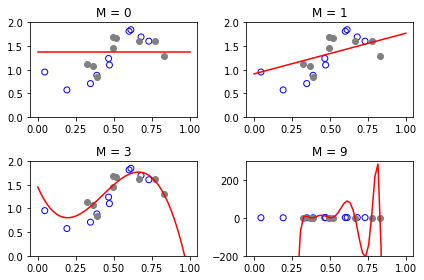

In [17]:
fig,axii = plt.subplots(2,2)

axes = list(axii[0])+list(axii[1])
Ms = [0,1,3,9]
E_rms = [[],[]]
for i in range(0,10):
    
    x_test = np.linspace(0,1)
    coefs = fitCoef(x[:9],y[:9],i)
    y_fit = polyGen(coefs,x_test) #Si era el otro fit, cambiar esto.
    
    E_rms[0].append(np.sqrt(chiSquare(polyGen(coefs,x[:9]),y[:9]))/10)
    E_rms[1].append(np.sqrt(chiSquare(polyGen(coefs,x[10:]),y[10:]))/10)
    
    if i in Ms:
        a = axes[Ms.index(i)]
        a.scatter(x[10:],y[10:],facecolors='none',edgecolors='b')
        a.scatter(x[:9],y[:9],c='grey')
        a.plot(x_test,y_fit,c='r')
        a.set_title("M = "+str(i))
        a.set_ylim(0,2)
        if i == 9:
            a.set_ylim(-200,300)
    
fig.tight_layout()

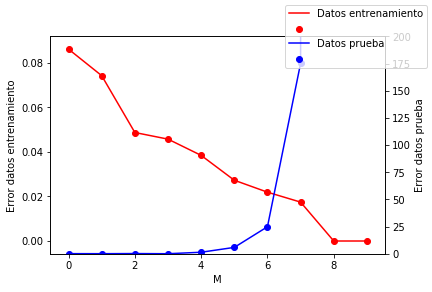

In [31]:
fig,ax1 = plt.subplots()
Ms = range(0,10)

ax1.plot(Ms,E_rms[0],c='r')
ax1.scatter(Ms,E_rms[0],c='r')
ax1.set_ylabel('Error datos entrenamiento')
ax1.set_xlabel('M')

ax2 = ax1.twinx()
ax2.plot(Ms,E_rms[1],c='b')
ax2.scatter(Ms,E_rms[1],c='b')
ax2.set_ylim(0,200)
ax2.set_ylabel('Error datos prueba')

fig.legend(['Datos entrenamiento',None,'Datos prueba',None])